In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# PCA
from sklearn.decomposition import PCA

In [13]:
data = "data/"
healthy_file, mutant_file = "data_healthy_ca.npy", "data_mutant_ca.npy"
healthy, mutant = np.load(data+healthy_file), np.load(data+mutant_file)

In [14]:
# flatten the last dimension
healthy = healthy.reshape((healthy.shape[0], healthy.shape[1]*healthy.shape[2]))
mutant  = mutant .reshape((mutant .shape[0], mutant .shape[1]*mutant .shape[2]))

In [15]:
healthy.shape

(187, 252)

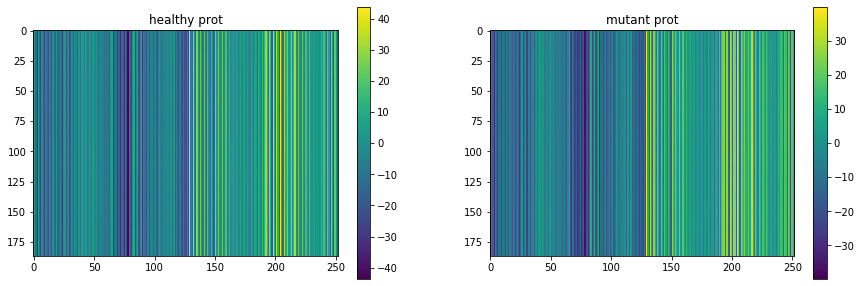

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# healthy prot
axs[0].set_title("healthy prot")
im0 = axs[0].imshow(healthy, cmap="viridis")
# mutated prot
axs[1].set_title("mutant prot")
im1 = axs[1].imshow(mutant, cmap="viridis")

fig.colorbar(im0, ax=axs[0])
fig.colorbar(im1, ax=axs[1])

plt.show()

In [17]:
pca = PCA(n_components=10)

# do the PCA with the normal and then project the mutant
healthy_pca = pca.fit_transform(healthy)
# project the mutant
mutant_pca  = pca.transform(mutant)

In [18]:
print("Percentage of variance explained by each component:", pca.explained_variance_ratio_[:5]*100)
print("Percentage of variance explained by first 5       :", pca.explained_variance_ratio_[:5].sum())

Percentage of variance explained by each component: [28.48525733 17.73267531 10.11353469  3.60112535  3.42176378]
Percentage of variance explained by first 5       : 0.6335435645737536


In [19]:
healthy_pca.shape

(187, 10)

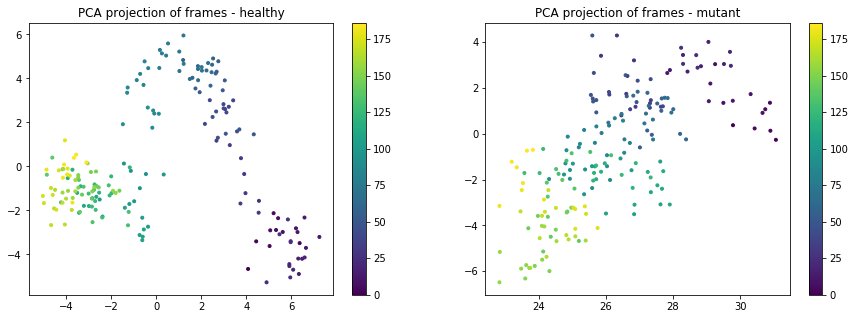

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# healthy prot
axs[0].set_title("PCA projection of frames - healthy")
points0 = axs[0].scatter(healthy_pca[:, 0], healthy_pca[:, 1], c=np.arange(0, healthy_pca.shape[0], 1), marker=".")
# mutated prot
axs[1].set_title("PCA projection of frames - mutant")
points1 = axs[1].scatter(mutant_pca[:, 0], mutant_pca[:, 1], c=np.arange(0, mutant_pca.shape[0], 1), marker=".")

fig.colorbar(points0, ax=axs[0])
fig.colorbar(points1, ax=axs[1])

plt.show()

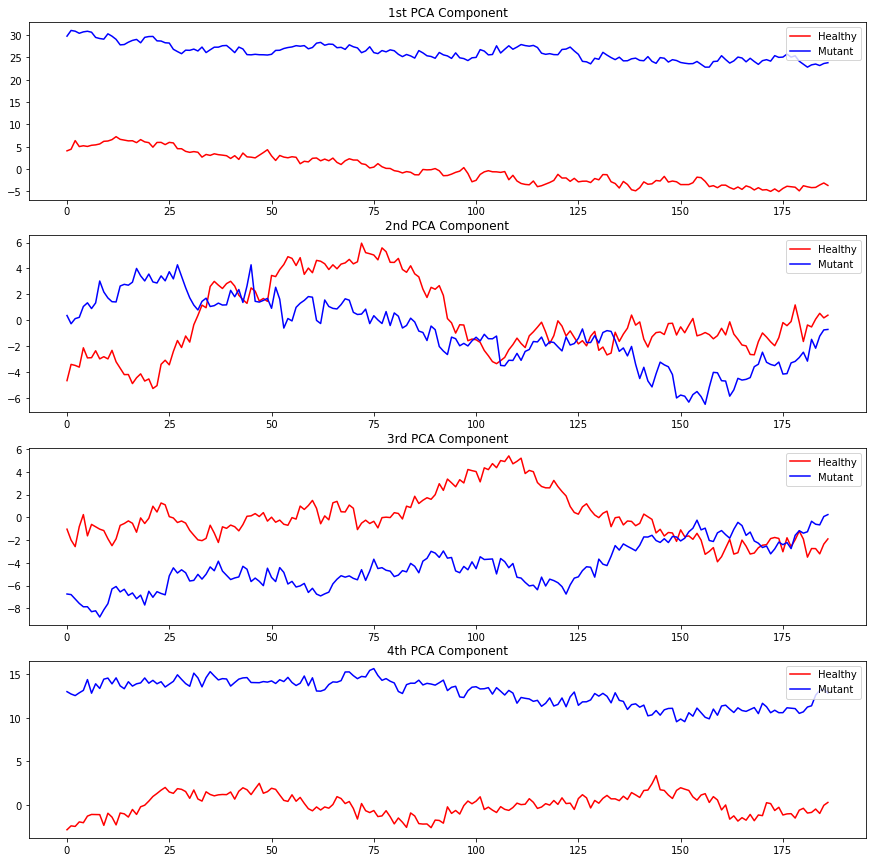

In [21]:
# PLOTS TO VISUALIZE THE DIFFERENCE:
fig, axs = plt.subplots(4, 1, figsize=(15, 15))

# PCA Analysis
axs[0].set_title("1st PCA Component")
axs[0].plot(healthy_pca[:, 0], "r-")
axs[0].plot(mutant_pca[:, 0], "b-")
axs[0].legend(["Healthy", "Mutant"], loc="upper right")

axs[1].set_title("2nd PCA Component")
axs[1].plot(healthy_pca[:, 1], "r-")
axs[1].plot(mutant_pca[:, 1], "b-")
axs[1].legend(["Healthy", "Mutant"], loc="upper right")

axs[2].set_title("3rd PCA Component")
axs[2].plot(healthy_pca[:, 2], "r-")
axs[2].plot(mutant_pca[:, 2], "b-")
axs[2].legend(["Healthy", "Mutant"], loc="upper right")

axs[3].set_title("4th PCA Component")
axs[3].plot(healthy_pca[:, 3], "r-")
axs[3].plot(mutant_pca[:, 3], "b-")
axs[3].legend(["Healthy", "Mutant"], loc="upper right")

plt.show()